In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [3]:
data = pd.read_csv("./Dataset/household_power_consumption.txt", sep=";")

C:\Users\nitis\AppData\Local\Temp\ipykernel_20440\1837839935.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./Dataset/household_power_consumption.txt", sep=";")


In [4]:
# convert to datetime
data["datetime"] = data["Date"] + " " + data["Time"]
data["datetime"] = pd.to_datetime(data["datetime"], dayfirst=True)

In [5]:
#set datetime as index

data.drop(columns=["Date", "Time"], inplace=True)
data.set_index("datetime", inplace=True)


In [6]:
# replace ? and convert each col to float and fillnas

for col in data.columns:
    data[col].replace("?", np.nan, inplace=True)
    data[col] = data[col].astype(np.float32)

data.ffill(method='ffill', axis=0, inplace=True)

C:\Users\nitis\AppData\Local\Temp\ipykernel_20440\1964392206.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', axis=0, inplace=True)


In [11]:
# concatenate by hour using index

data_resampled = data.resample("H").sum()
data_resampled["hour"] = data_resampled.index.hour
data_resampled.index = data_resampled.index.date


<Axes: xlabel='hour'>

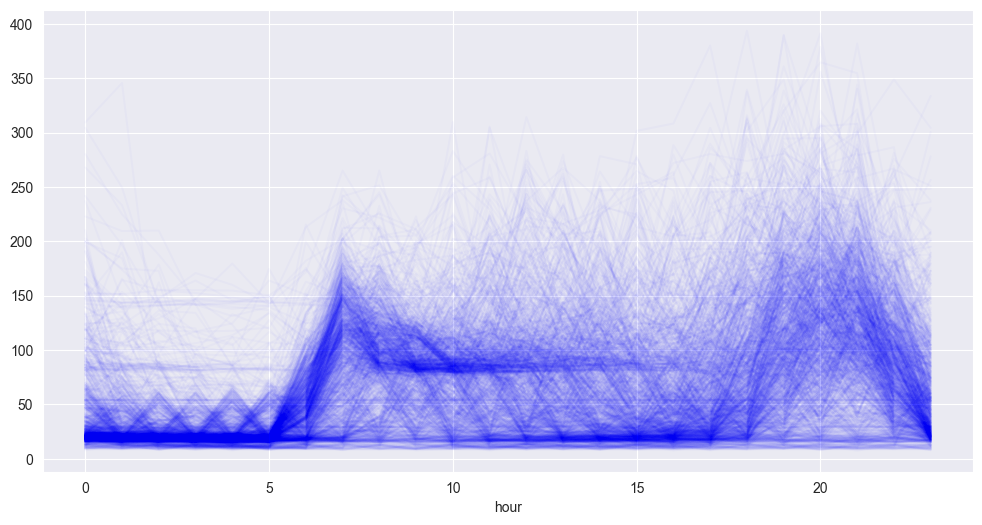

In [39]:
# plot energy usage

data_resampled.pivot(columns='hour', values="Global_active_power").dropna().T.plot(figsize=(12, 6), alpha=0.02, color="blue", legend=False)

c:\Users\nitis\nitish\machine_learning\energy_consumption_clustering\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nitis\nitish\machine_learning\energy_consumption_clustering\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nitis\nitish\machine_learning\energy_consumption_clustering\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nitis\nitish\machine_learning\energy_consumption_clustering\lib\site-packages\sea

<Axes: xlabel='hour', ylabel='Global_active_power'>

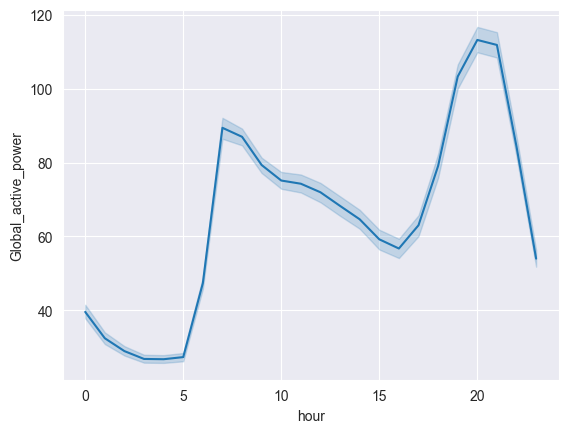